This is a value iteration method to extract the value function from the commute to work example taken by the Computerphile RL videos on youtube.

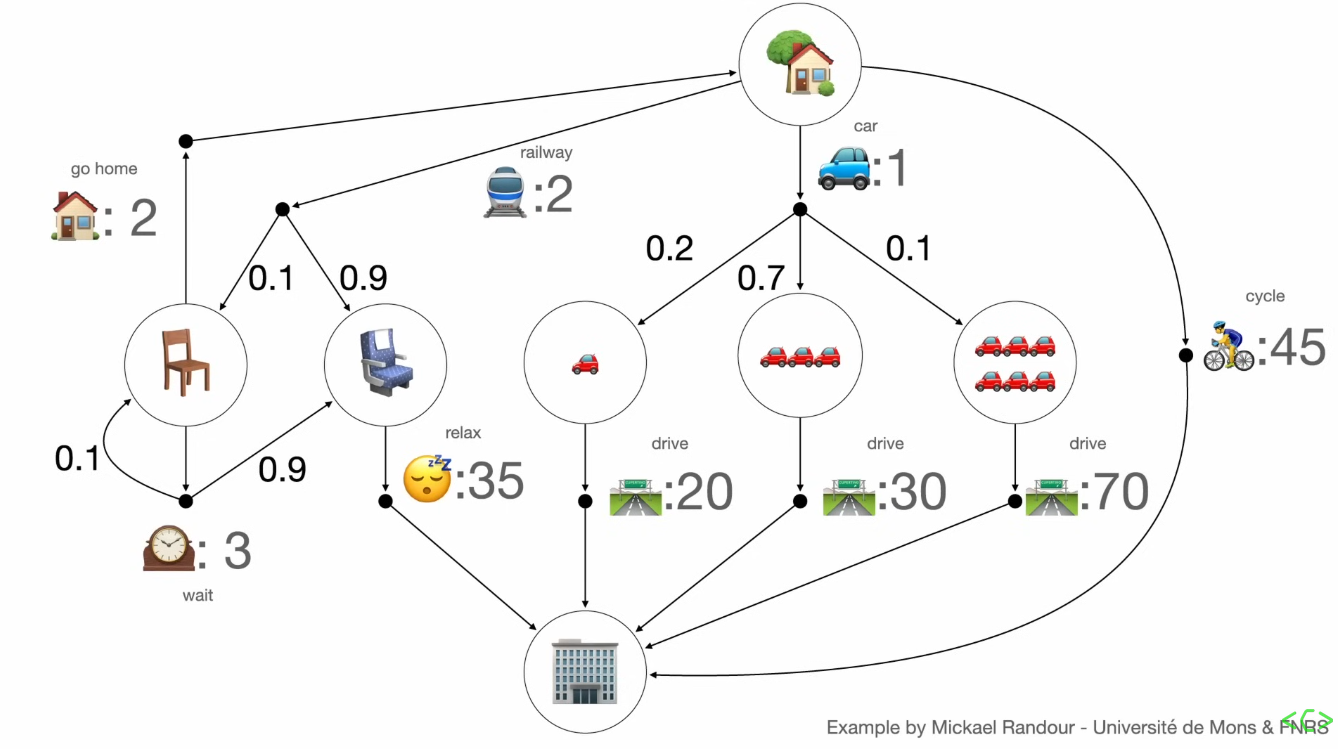

In [54]:
# State structure: [value_function, [immediate_rewards], [transition_probabilities], [next_states]]
# This represents a Markov Decision Process for the commute to work problem

value_function = {
    'home': [100, [2, 1, 40], [[0.1, 0.9], [0.2, 0.7, 0.1], [1]], [['waiting_room', 'train'], ['light', 'medium', 'high'], ['terminal']]], 
    'medium': [100, [30], [[1]], [['terminal']]],
    'light': [100, [20], [[1]], [['terminal']]],
    'high': [100, [70], [[1]], [['terminal']]],
    'bike': [100, [45], [[1]], [['terminal']]],
    'terminal': [0],
    'train': [100, [35], [[1]], [['terminal']]],
    'waiting_room': [100, [2, 3], [[1], [0.9, 0.1]], [['home'], ['train', 'waiting_room']]]
}

In [55]:
# Helper functions for clarity
def get_state_value(state_name):
    """Get the current value estimate for a state."""
    return value_function[state_name][0]

def get_next_state_value(state_name, next_state_name):
    """Get the value of the next state."""
    return value_function[next_state_name][0]

# Value Iteration Algorithm
convergence_threshold = 1e-2
residuals = [100]

while max(residuals) > convergence_threshold:
    residuals = []
    backup_values = []
    for state_name in value_function:
        # Skip terminal state (has no actions)
        if state_name == 'terminal':
            backup_values.append(0)
            continue
        
        immediate_rewards = value_function[state_name][1]
        transition_probabilities = value_function[state_name][2]
        next_states = value_function[state_name][3]
        
        # Compute Q-value for each possible action
        action_values = []
        
        for action_idx in range(len(immediate_rewards)):
            # Expected value = immediate reward + sum of (transition probability * next state value)
            expected_future_value = 0
            
            for next_state_idx in range(len(transition_probabilities[action_idx])):
                probability = transition_probabilities[action_idx][next_state_idx]
                next_state_name = next_states[action_idx][next_state_idx]
                next_state_value = get_next_state_value(state_name, next_state_name)
                expected_future_value += probability * next_state_value
            
            action_value = immediate_rewards[action_idx] + expected_future_value
            action_values.append(action_value)
        
        # Bellman update: minimize cost
        old_value = value_function[state_name][0]
        new_value = min(action_values)
        
        residuals.append(abs(old_value - new_value))
        backup_values.append(new_value)
    
    # Apply all updates simultaneously
    for state_name, new_value in zip(value_function, backup_values):
        value_function[state_name][0] = new_value

    print(f"Iteration residuals: {residuals}")

Iteration residuals: [60, 70, 80, 30, 55, 65, 2]
Iteration residuals: [7.0, 0, 0, 0, 0, 0, 60]
Iteration residuals: [0.0, 0, 0, 0, 0, 0, 7.0]
Iteration residuals: [0.0, 0, 0, 0, 0, 0, 0.0]


In [58]:
# Claude made pretty-print function!

def print_value_function_results():
    """Pretty print the converged value function results."""
    print("\n" + "="*60)
    print("VALUE FUNCTION RESULTS - COMMUTE TO WORK PROBLEM")
    print("="*60 + "\n")
    
    for state_name in value_function:
        value = value_function[state_name][0]
        
        # Format the state value
        print(f"{state_name.upper():<20} Value: {value:>8.2f}", end="")
        
        # If not terminal, show available actions
        if state_name != 'terminal':
            rewards = value_function[state_name][1]
            action_values = []
            
            for action_idx, reward in enumerate(rewards):
                # Recalculate action value for display
                prob_list = value_function[state_name][2][action_idx]
                next_state_list = value_function[state_name][3][action_idx]
                
                action_value = reward
                for prob, next_state in zip(prob_list, next_state_list):
                    action_value += prob * value_function[next_state][0]
                
                action_values.append(action_value)
            
            optimal_action_idx = action_values.index(min(action_values))
            if state_name == 'home':
                actions = ['Train', 'Drive', 'Cycle']
            elif state_name == 'waiting_room':
                actions = ['Go Home', 'Wait']
            else:
                actions = ['No action needed.']
            print(f"  [Optimal action: {actions[optimal_action_idx]}]")
        else:
            print()
    
    print("\n" + "="*60)

# Display the results
print_value_function_results()


VALUE FUNCTION RESULTS - COMMUTE TO WORK PROBLEM

HOME                 Value:    33.00  [Optimal action: Drive]
MEDIUM               Value:    30.00  [Optimal action: No action needed.]
LIGHT                Value:    20.00  [Optimal action: No action needed.]
HIGH                 Value:    70.00  [Optimal action: No action needed.]
BIKE                 Value:    45.00  [Optimal action: No action needed.]
TERMINAL             Value:     0.00
TRAIN                Value:    35.00  [Optimal action: No action needed.]
WAITING_ROOM         Value:    35.00  [Optimal action: Go Home]

